## IRIS FLOWER CLASSIFICATION

#### This project is a part of internship at AICTE OASIS INFOBYTE.

**Project task**

Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them. 

In [1]:
pwd #present working directory

'C:\\Users\\vaish'

In [2]:
import os
os.chdir("E:\\JOB\\OASIS info\\Data_Science\\1.Iris_classification") #changing directory

In [3]:
#importing required common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Obersvation** after loading the dataset
1. "Id" column or feature is not important
2. Name of the rest of the columns need to change it is long and repeat the unit which is not necessary.


In [5]:
#drop the column 'Id'
df.drop('Id', axis = 1, inplace = True)

In [6]:
#renameing the column name
column = { 'SepalLengthCm': 'sl','SepalWidthCm':'sw','PetalLengthCm':'pl','PetalWidthCm':'pw','Species':'species'}

df.rename(columns = column , inplace = True)
df.head()

,sl,sw,pl,pw,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#checking for any missing or null values
df.isnull().sum()

sl         0
sw         0
pl         0
pw         0
species    0
dtype: int64

**Observation** from above code:
1. No any misssing values are there in the dataset.

In [8]:
#checking data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sl       150 non-null    float64
 1   sw       150 non-null    float64
 2   pl       150 non-null    float64
 3   pw       150 non-null    float64
 4   species  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
#checking unique values for species
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

**Observation**:
Data types are relavent to specific features. No need to change. 

*Datasets are **cleaned**, and so we can move for further **EDA**, **Visualization**, **Feature selection** and **model building** and **selecting best model**.*

Performing EDA

**Exploratory data analysis**

In [10]:
#summary statistics
df.describe()

,sl,sw,pl,pw
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Observation**
1. total 150 number of observations are there
2. mean for sepal length (**sl**) is 5.84, sepal width (**sw**) is 3.05, petal length (**pl**) is 3.76 and petal width (**pw**) is 1.20.
3. to better understand the summary statistics the visualization will help more about data distribution.

Text(0.5, 1.0, 'Pairplot for features')

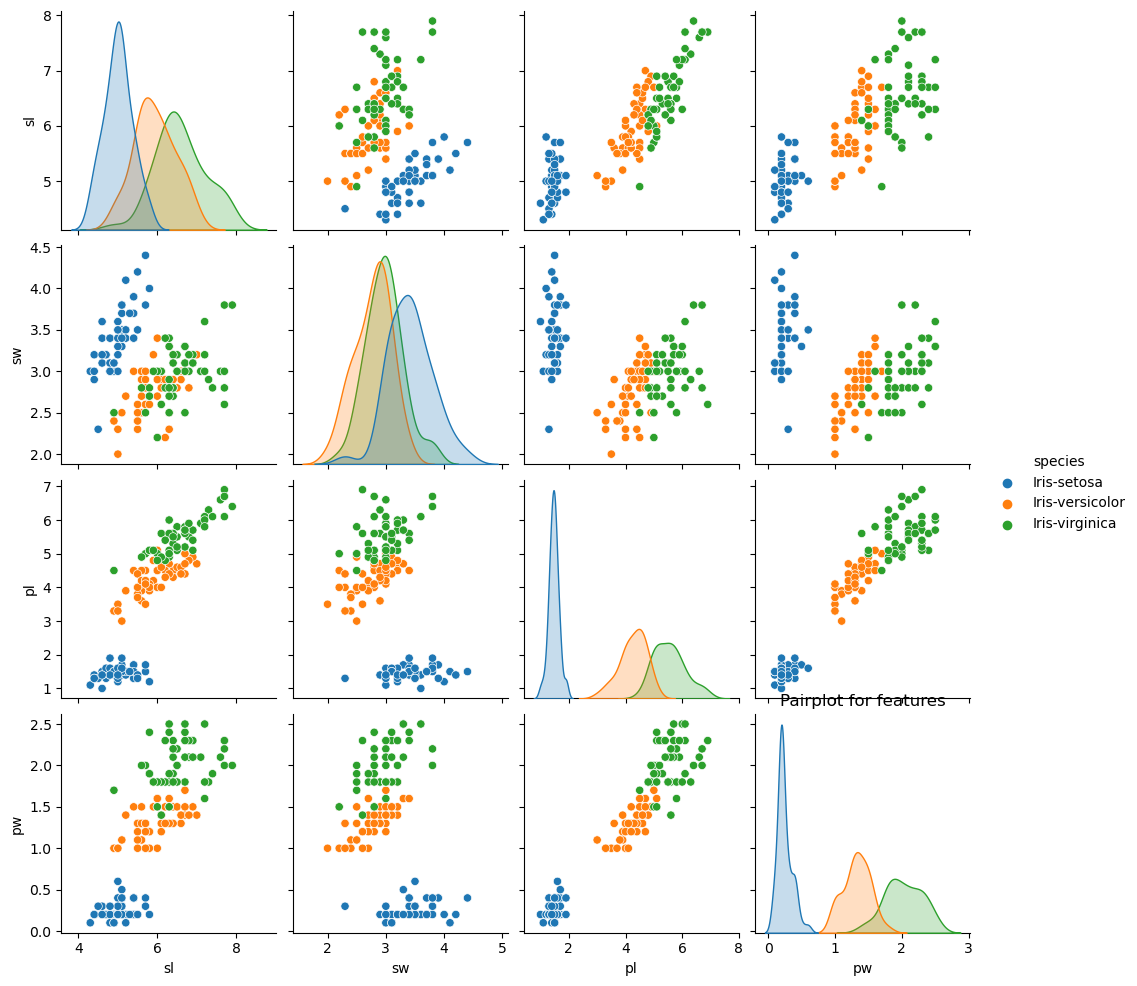

In [11]:
sns.pairplot(data=df, hue='species')
plt.title("Pairplot for features")

**Observation**
1. Histogram along the diagonal of pairplot shows the distribution of each features. 
2. sepal length **sl** and sepal width **sw** are seems to have normal distribution of dataset.
3. petal length **pl** and petal width **pw** show skewness in the dataset. Left side distribution of datasets have high frequency than right side distirbution of dataset. 
4. As sepal length **sl** increases the peal length **pl** also increase and scatter plot shows linear positive relationship. 
5. The same way petal width **pw** and petal length **pl** show positive linear relationship.
6. Rest of the scatter plot does not indicate any relationship with other features. But, it significantly shows different clusters. It indicates that those feature which shows cluster in scatter plot are significant distinguishable identifier for target variable. 

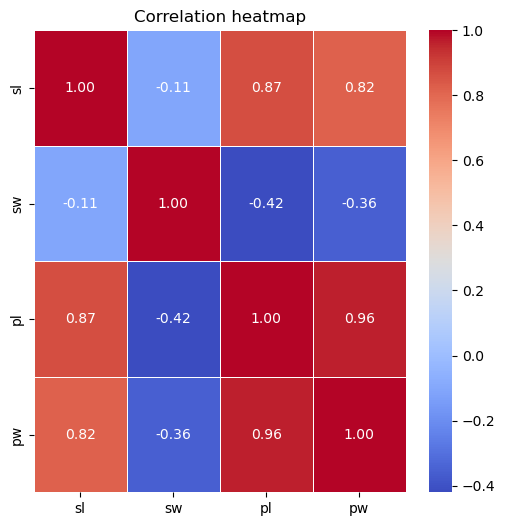

In [12]:
correlation_matrix = df.corr()
plt.figure(figsize=(6,6))
sns.heatmap(data=correlation_matrix, annot= True, cmap='coolwarm', fmt = '.2f', linewidths = 0.5)
plt.title('Correlation heatmap')
plt.show()

**Observation** from heatmap which identifies the correlation of features with each other.
1. sepal length **sl** is highly correlated to petal length **pl** by 87% and petal width **pw** by 82%. 
2. petal width **pw** is highly correlated to  petal length **pl** by 96%. 
3. sepal width **sw** does not correlate to any feature so we can neglect this feature while model building. 

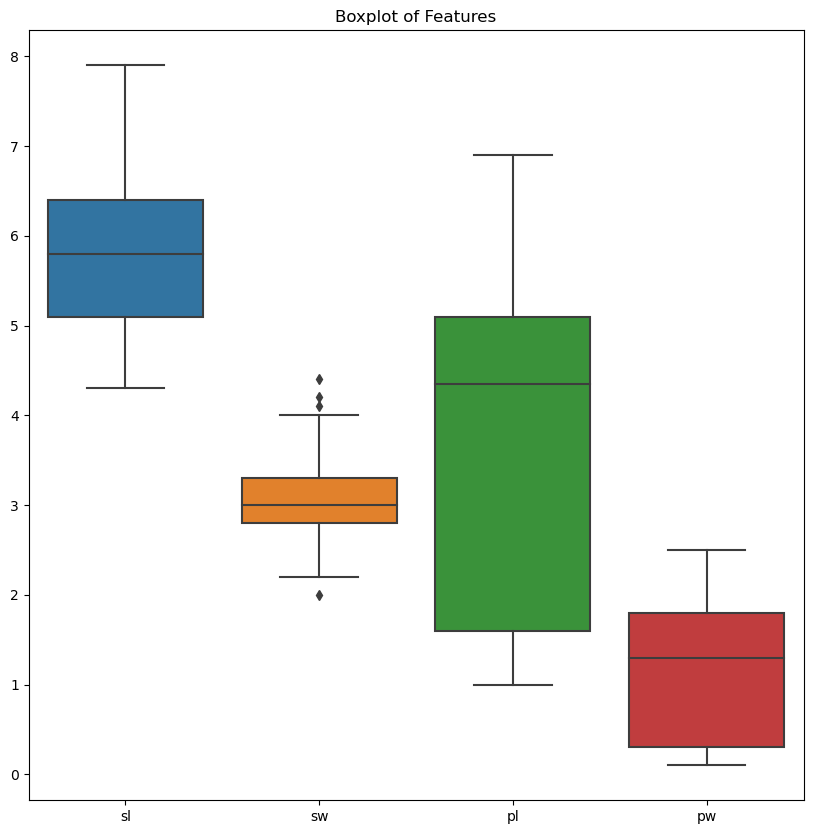

In [13]:
#visualizing feature through boxplot
plt.figure(figsize=(10,10))
sns.boxplot(data=df)
plt.title("Boxplot of Features")
plt.show()

**Observation** from boxplot:
1. As we have decided to neglect feature sepal width **sw** on model building and it has few outliers we can keep as it is. 
2. petal length **pl** and petal width **pw** have median shifted towards the maximum. Which indicates skewness present in dataset. The summary statistics and boxplot correlated the result for both this feature by measuring mean, max and median. 

**Feature selection**

Based on the observation , we will separate features and target variables

In [14]:
X = df.drop(['species', 'sw'], axis=1)  # Features
Y = df['species']  # Target variable


In [15]:
#before moving forward for maintaing consitency normalizaiton of data is necessary
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

Xn = scaler.fit_transform(X) #normalized X

**Target variable** has three unique species 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'which are categorical, we will need to convert into numerical by label encoding. 

In [16]:
#target variable has three unique 
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

Ye = label_encoder.fit_transform(Y) #Encoded Y

In [17]:
class_labels = label_encoder.classes_
print('Encoded classes:', class_labels)

Encoded classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [18]:
encoded_names = dict(zip(range(len(class_labels)), class_labels))
print('Encoded names', encoded_names)

Encoded names {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}


**Model building**
We will try to use possilbe supervised machine learning classification algorithms and check for the accuracy for all build model. 

Here, from three classification of species, we have to build the model such a way that when new features dataset are given it can classify true speices from dataset. 

We have:
1. Logistic regression
2. Decision tree classifer
3. K-nearest neighbors
4. Naive bayes
5. Suppost vector machines

In [19]:
#spliiting the data into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xn, Ye, test_size = 0.2, random_state = 42)

In [20]:
#importing models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

f1_score = {}
recall_Score = {}
confusion_matrices = {}

In [22]:
#model building

lr = LogisticRegression()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
nb = GaussianNB()
svc = SVC()

models = {'Logistic regression':lr,
          'Decision tree':dt,
          'K-Nearest neighbors':knn,
          'Naive Bayes':nb,
          'Support Vector Machines':svc}

In [23]:
#model fiting and training

for i,m in models.items():
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for {i}:{accuracy:.4f}')
    
    #calculate precision, recall and f1_score and confusion matrix

    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    
    #printing 
    print(f'Model:{i}')
    print(f"Classification Report for :\n{report}")
    print(f"Confusion Matrix for :\n{confusion}\n")
    

Accuracy for Logistic regression:1.0000
Model:Logistic regression
Classification Report for :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix for :
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Accuracy for Decision tree:1.0000
Model:Decision tree
Classification Report for :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

C

**Observation**

Except the logistic regression all the models show the same accuracy and almost same result. 
We need to apply cross-validation technique to assess the performance of a machine learning model. 

In [24]:
from sklearn.model_selection import cross_val_score ,KFold

In [25]:
models = {'Logistic regression':lr,
          'Decision tree':dt,
          'K-Nearest neighbors':knn,
          'Naive Bayes':nb,
          'Support Vector Machines':svc}

kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)


for m,n in models.items():
    scores = cross_val_score(n, X,Ye, cv = kfold, scoring = 'accuracy')
    
    print(f'Model: {m}')
    print(f'Cross validation score:{scores}')
    print(f'Mean accuracy:{scores.mean()}')
    

Model: Logistic regression
Cross validation score:[1.         1.         0.93333333 0.93333333 0.96666667]
Mean accuracy:0.9666666666666668
Model: Decision tree
Cross validation score:[1.         1.         0.93333333 0.93333333 0.93333333]
Mean accuracy:0.9600000000000002
Model: K-Nearest neighbors
Cross validation score:[1.         0.96666667 0.96666667 0.93333333 0.96666667]
Mean accuracy:0.9666666666666668
Model: Naive Bayes
Cross validation score:[1.         0.96666667 0.93333333 0.93333333 0.96666667]
Mean accuracy:0.9600000000000002
Model: Support Vector Machines
Cross validation score:[1.         1.         0.93333333 0.93333333 0.96666667]
Mean accuracy:0.9666666666666668


**Observation**

1. All the models have accuracy of 97%. 
2. Previously, we have seen heatmap to find correlation between features. Where we have observed that scatter plots of few features overlap with each other.
3. Features do not have linear relation with high correlated variables. 
4. KNN relies on distance between data points in the feature space to make prediction.

Hence we will select **KNN- K- Nearset neighbor** model for **IRIS flower classification machine learning model**. 

**Model deployment**

Testing the model prediction

In [30]:
X_new = np.array([[2.3,2.1,1.2]])

X_new_pr = scaler.transform(X_new)

prediction = knn.predict(X_new_pr)

predicted_species = label_encoder.inverse_transform(prediction)
print("Predicted speices for the new data features:", predicted_species)

Predicted speices for the new data features: ['Iris-setosa']


### Project by -

**Vaishnavi Patel**
*(Ph.D - Physics)*